### Work on data3: Accidents on M and A(M) roads

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import folium
import time
from IPython.display import display
%matplotlib inline
matplotlib.style.use('ggplot')

/Users/XueqiWang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Plot the accident map in each year

In [8]:
years = ['2009', '2010', '2011', '2012', '2014']
for year in years:
    df = pd.read_csv('data2/Accidents_'+ year + '.csv',low_memory=False)
    rst = df #[(df['1st_Road_Class'] <= 3) & (df['Accident_Severity'] < 3)]
    Long = rst.Longitude
    Lat = rst.Latitude
    severity = rst.Accident_Severity
    se_color = {1:'#000000', 2: '#FF0000', 3:'#FF8400'}  #fatal: black; serious: red; slight: orange
    map_osm = folium.Map(location=[Lat.values[0],Long.values[0]], tiles='Stamen Toner') #,zoom_start=12) # latitude and longitude
    i=0
    while (i<len(Long)):
        folium.CircleMarker([Lat.values[i],Long.values[i]],
                            radius = 10,
                            popup = 'Laurelhurst Park',
                            color = se_color[severity.values[i]],
                            fill_color = se_color[severity.values[i]],
                           ).add_to(map_osm)
        i+=1
    map_osm.create_map(path='osm.html')
    map_osm.save('map/accident_'+ year + '.html')
    map_osm

/Users/XueqiWang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: FutureWarning: Map.create_map is deprecated. Use Map.save instead


The number of accident in each month

In [31]:
df = pd.read_csv('data2/Accidents_2014.csv',low_memory=False)
df = df[['Local_Authority_(District)','Longitude', 'Latitude','Accident_Severity']]
dist = df['Local_Authority_(District)'].value_counts()
print dist
len(dist)

129    150
926    122
514    117
538    108
204    104
424     99
128     96
456     92
516     84
434     84
542     82
33      80
477     79
473     79
211     78
300     75
290     72
513     66
130     64
536     62
502     62
213     60
481     58
474     57
436     57
471     55
107     55
307     52
26      50
635     49
      ... 
114      6
161      5
581      5
751      5
580      5
934      5
302      5
452      4
472      4
184      4
919      4
497      4
925      4
14       3
303      3
93       3
150      3
341      3
470      3
252      2
324      2
499      2
535      2
563      2
276      1
922      1
478      1
149      1
285      1
457      1
Name: Local_Authority_(District), dtype: int64


193

In [21]:
rst = df[df['Local_Authority_(District)'] ==129]
Long = rst.Longitude
Lat = rst.Latitude
severity = rst.Accident_Severity
se_color = {1:'#000000', 2: '#FF0000', 3:'#FF8400'}  #fatal: black; serious: red; slight: orange
map_osm = folium.Map(location=[Lat.values[0],Long.values[0]],tiles='Stamen Toner')
i=0
while (i<len(Long)):
    folium.CircleMarker([Lat.values[i],Long.values[i]],
                        radius = 10,
                        popup = 'Laurelhurst Park',
                        color = se_color[severity.values[i]],
                        fill_color = se_color[severity.values[i]],
                       ).add_to(map_osm)
    i+=1
map_osm.create_map(path='osm.html')
map_osm

/Users/XueqiWang/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: Map.create_map is deprecated. Use Map.save instead


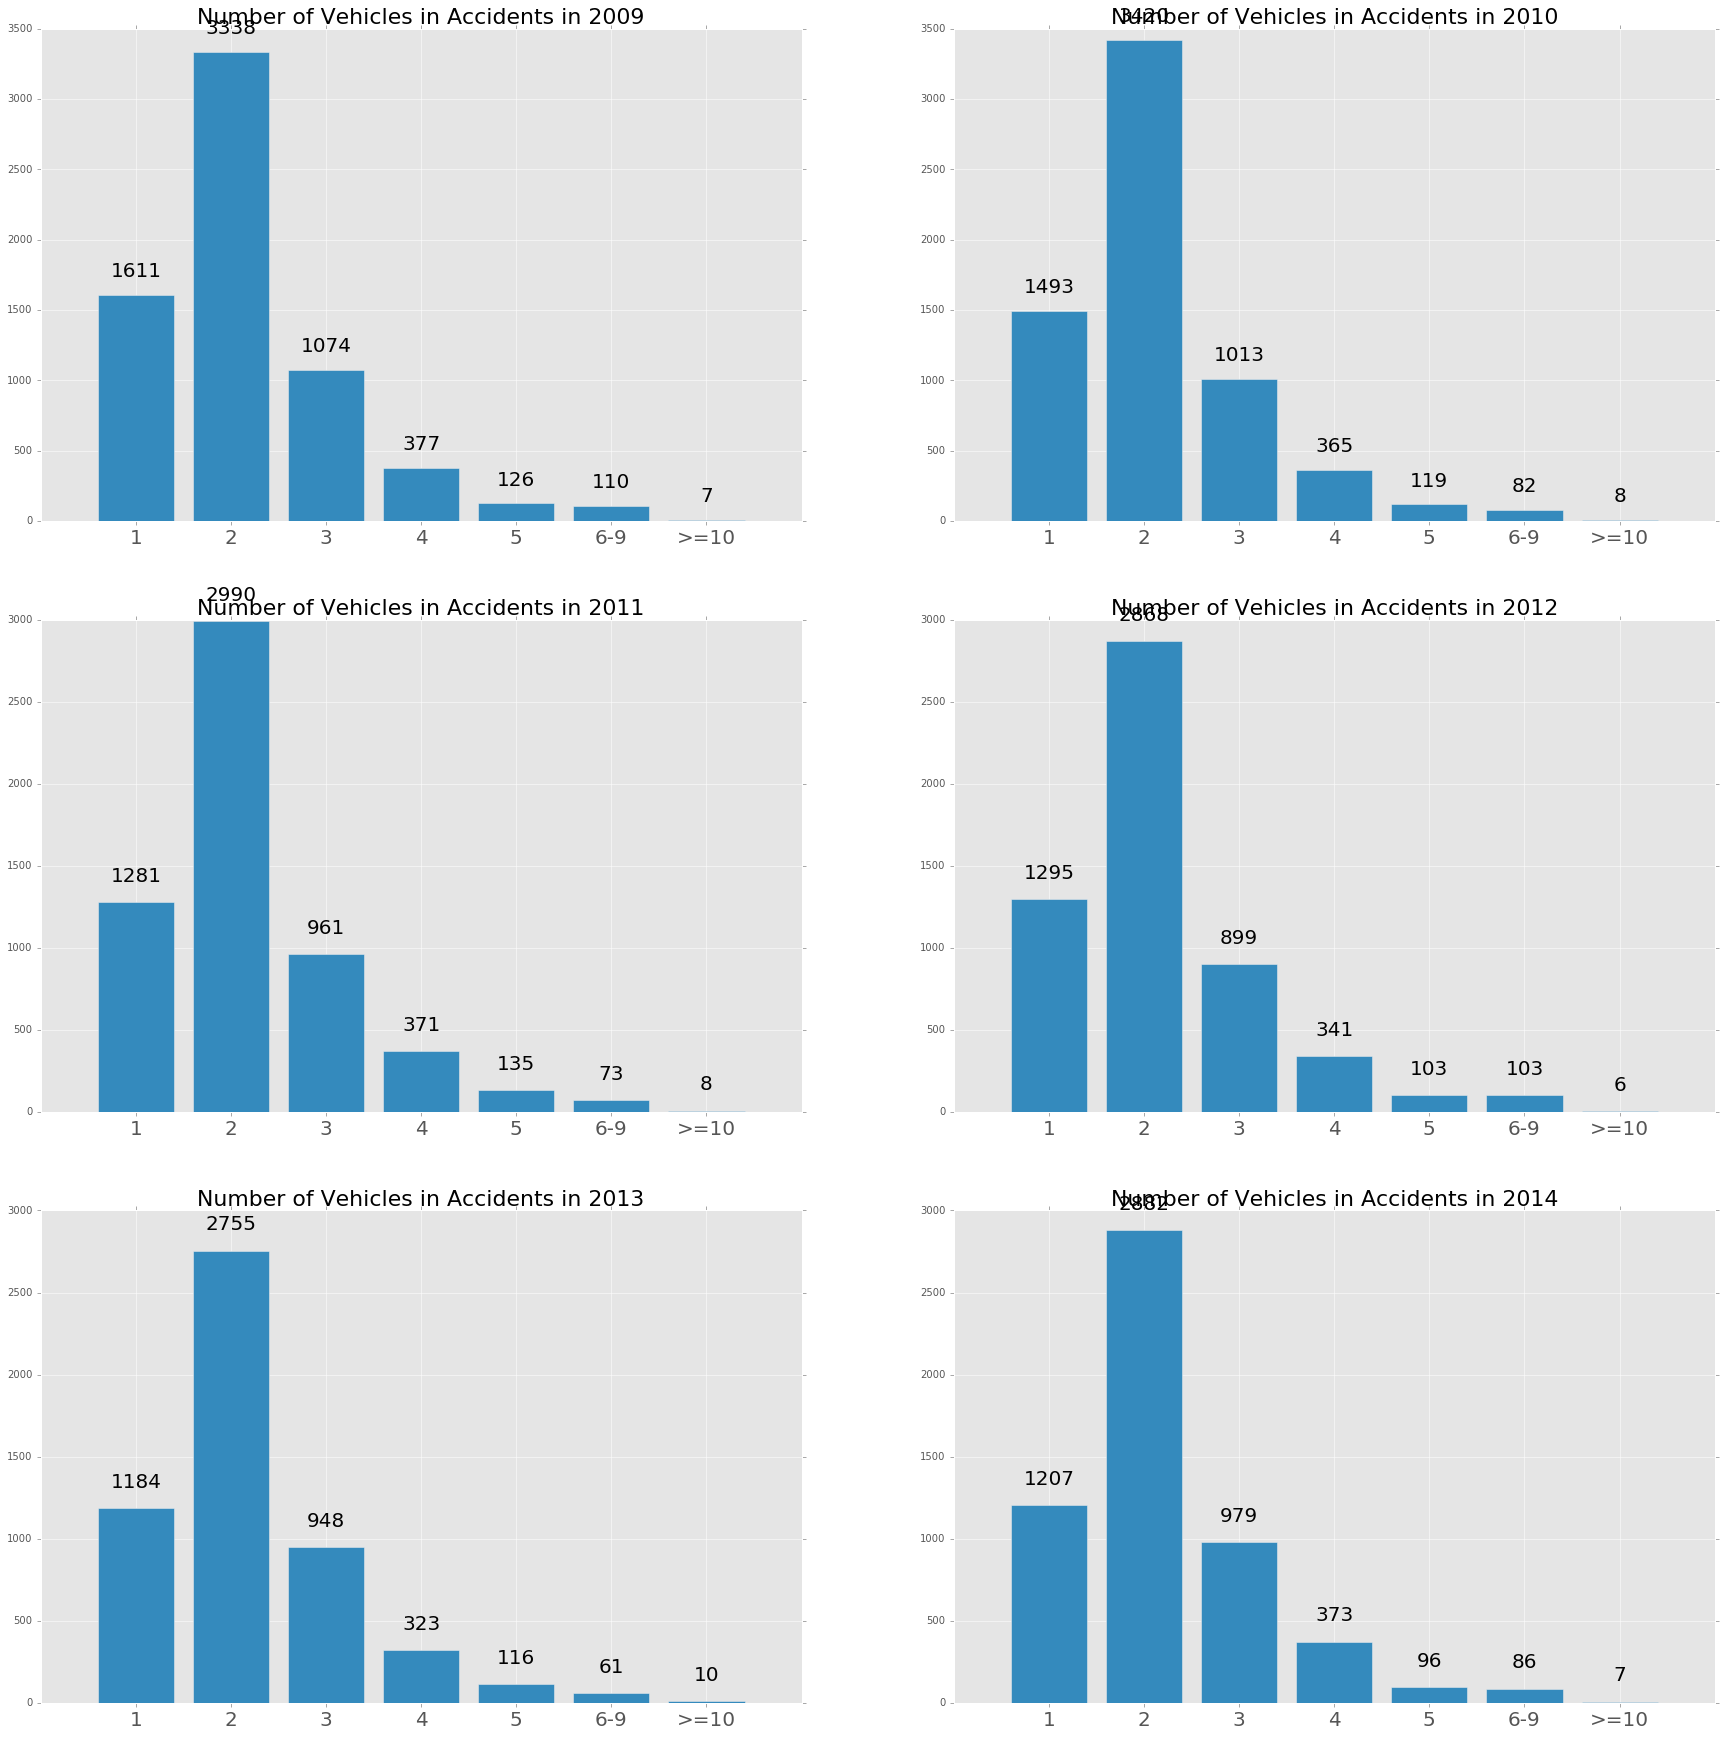

In [32]:
%matplotlib inline
years = ['2009', '2010', '2011', '2012', '2013', '2014']
plt.figure(figsize = (30,30))
nfig = 1
for year in years:
    df = pd.read_csv('data2/Accidents_' + year + '.csv',low_memory=False)
    s = df['Number_of_Vehicles'].value_counts()
    bins = [0]*7
    s = s.sort_index(axis = 0, ascending = True)
    for i in range(6):
        bins[i] = s[i+1]
    bins[5] = sum(s.loc[6:9])
    bins[6] = sum(s.loc[10:])
    plt.subplot(3,2,nfig)
    index = range(1,8)
    plt.bar(index, bins,align = 'center')
    labels = ['1','2','3','4','5','6-9','>=10']
    plt.title('Number of Vehicles in Accidents in ' + year, fontsize = 22)
    plt.xticks(index,labels, fontsize = 20)
    for j, v in zip(index, bins):
        plt.text(j, v+100, v, ha='center', va='bottom',fontsize = 20)
    nfig += 1